# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

# Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи** — <u>users_go.csv</u>  

| Столбец | Значение | 
|:--------:|:--------------|
|  **user_id**  |  уникальный идентификатор пользователя   | 
|  **name**   |  имя пользователя   |
|  **age**   |  возраст  |
|  **city**   |  город   |
|  **subscription_type**   |  тип подписки (free, ultra)   |

**Поездки** — <u>rides_go.csv</u>  

| Столбец | Значение | 
|:--------:|:-------------------|
|  **user_id**  |  уникальный идентификатор пользователя   | 
|  **distance**   |  расстояние, которое пользователь проехал в текущей сессии (в метрах)   |
|  **duration**   |  продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
  |
|  **date**   |  дата совершения поездки   |

**Подписки** — <u>subscriptions_go.csv</u>  

| Столбец | Значение | 
|:--------:|:-------------------|
|  **subscription_type**  |  тип подписки   | 
|  **minute_price**   |  стоимость одной минуты поездки по данной подписке   |
|  **start_ride_price**   | стоимость начала поездки  |
|  **subscription_fee**   |  стоимость ежемесячного платежа   |

# План работы

**Шаг 1. Загрузка данных  
Шаг 2. Предобработка данных  
Шаг 3. Исследовательский анализ данных  
Шаг 4. Объединение данных  
Шаг 5. Подсчёт выручки  
Шаг 6. Проверка гипотез**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

### Шаг 1. Загрузка данных

#### 

In [2]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

#### 

In [3]:
display(users.head(10), rides.head(10), subscriptions.head(10))
users.info()
print()
rides.info()
print()
subscriptions.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   C

### Шаг 2. Предобработка данных

#### 

In [4]:
rides['date'] = pd.to_datetime(rides['date'])

#### 

In [5]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


#### 

Пропущенных значений в датафреймах нет, судя по общей информации о них.

In [6]:
print(f'Число явных дубликатов в таблице пользователи: {users.duplicated().sum()}', '\n'
      f'Число явных дубликатов в таблице с поездками: {rides.duplicated().sum()}','\n'
      f'неповторяющиеся названия городов: {users.city.unique()}')

Число явных дубликатов в таблице пользователи: 31 
Число явных дубликатов в таблице с поездками: 0 
неповторяющиеся названия городов: ['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


In [7]:
users = users.drop_duplicates().reset_index(drop=True)
users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


Число строк в таблице пользователей уменьшилось на 31, как и предполагалось при проверке на явные дубликаты

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

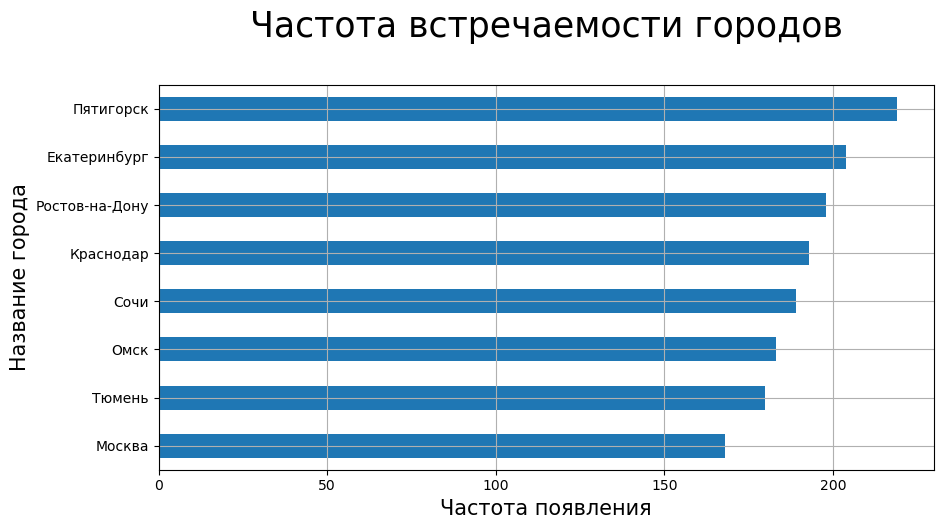

In [8]:
(
    users['city'].value_counts(ascending=True).to_frame()
    .plot(kind = 'barh', grid=True, figsize=(10, 5), legend=False)
    .set_title('Частота встречаемости городов' + "\n", fontsize = 25)
)
plt.ylabel('Название города', fontsize = 15);
plt.xlabel('Частота появления', fontsize = 15);

В городе Пятигорск совершено больше всего поездок, а в Москве меньше всего.

#### Соотношение пользователей с подпиской и без подписки

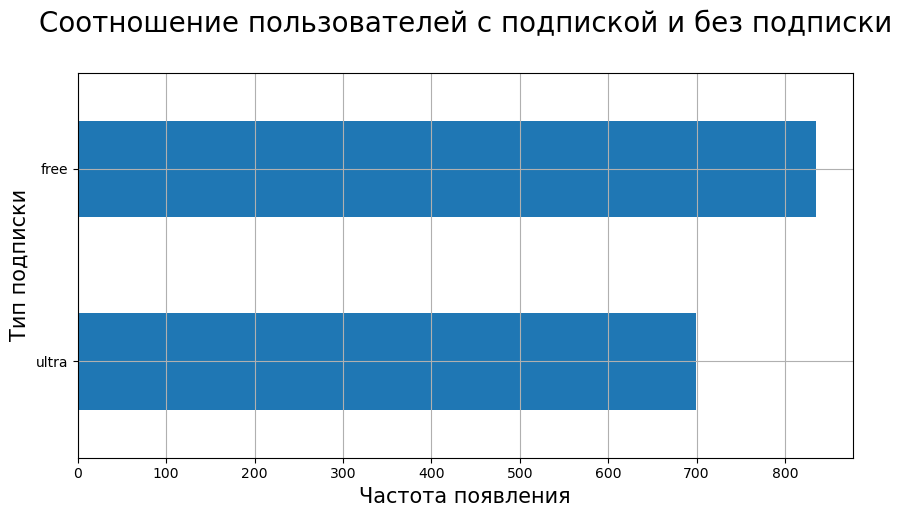

In [9]:
(
    users['subscription_type'].value_counts(ascending=True).to_frame()
    .plot(kind = 'barh', grid=True, figsize=(10, 5), legend=False)
    .set_title('Соотношение пользователей с подпиской и без подписки' + "\n", fontsize = 20)
)
plt.ylabel('Тип подписки', fontsize = 15);
plt.xlabel('Частота появления', fontsize = 15);

In [10]:
share = round(
    users.query('subscription_type == "free"')
    .subscription_type.count() / users.shape[0], 2)
print(f'Всего пользователей: {users.shape[0]}',
      '\n'f'Доля пользователей без подписки: {share}', 
      '\n'f'Доля пользователей с подпиской: {round(1 - share, 2)}')

Всего пользователей: 1534 
Доля пользователей без подписки: 0.54 
Доля пользователей с подпиской: 0.46


Число пользователей без подписки больше чем с ней.

#### Возраст пользователей

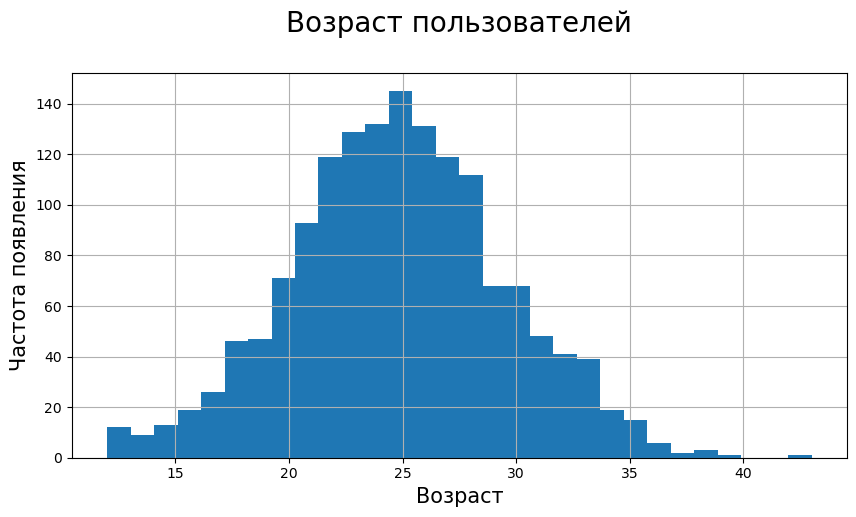

In [11]:
(
    users['age'].hist(bins=30, figsize=(10, 5))
    .set_title('Возраст пользователей' + "\n", fontsize = 20)
)
plt.xlabel('Возраст', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

График выглядит как нормальное распределение. У большего числа пользователей возраст составляет 25 лет.

#### Расстояние, которое пользователь преодолел за одну поездку

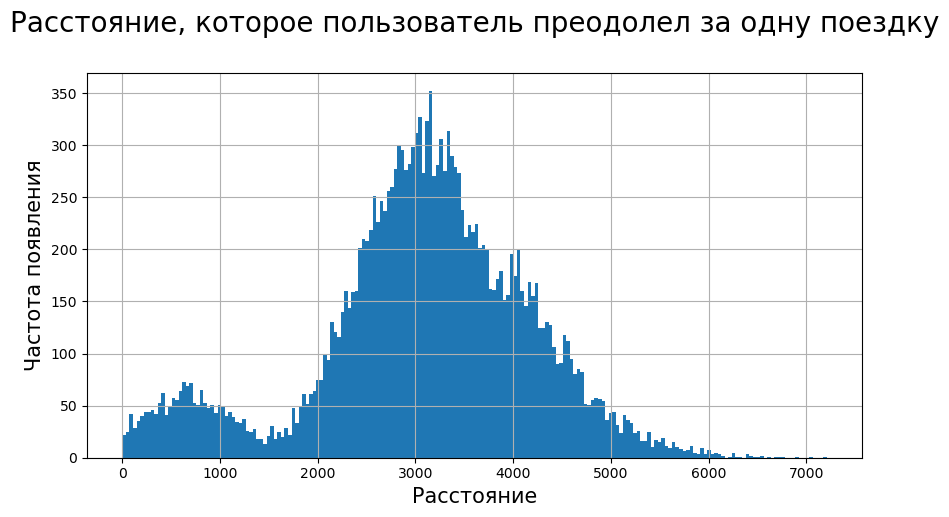

In [12]:
(
    rides['distance'].hist(bins=200, figsize=(10, 5))
    .set_title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", fontsize = 20)
)
plt.xlabel('Расстояние', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Чаще всего клиенты проделывали путь около 3150м за одну поездку. Также присутствует пик в районе значения 500 метров, думаю он связан с тем, что самокат мог был быть неисправен.

#### Продолжительность поездок

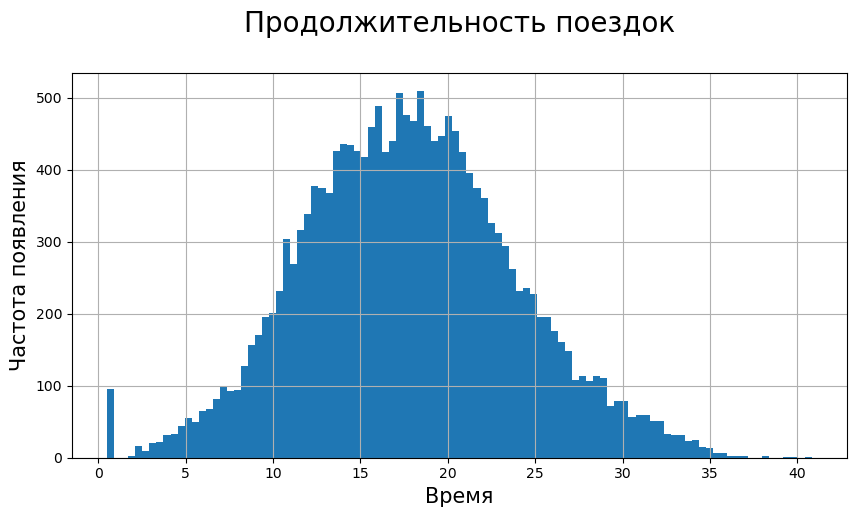

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

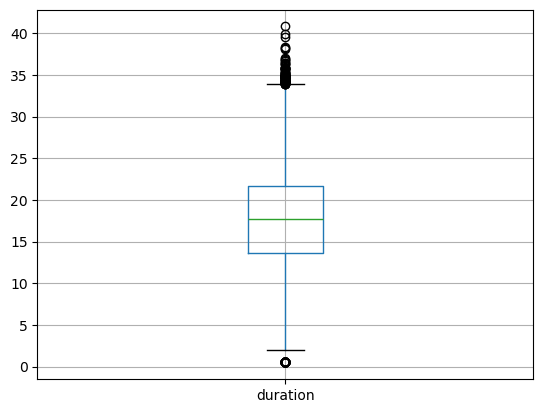

In [13]:
(
    rides['duration'].hist(bins=100, figsize=(10, 5))
    .set_title('Продолжительность поездок' + "\n", fontsize = 20)
)
plt.xlabel('Время', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
rides.boxplot(column=['duration']);
rides['duration'].describe()

Обнаружено аномально маленькие значения меньше 1, а также аномально большие значения больше 34. В среднем пользователи ездили на самокатах чаще всего от 15 до 20 минут.

### Шаг 4. Объединение данных

#### 

In [14]:
all_merged = users.merge(rides).merge(subscriptions)
display(all_merged.isna().sum())
print(all_merged.shape[0], '- Размер таблицы не изменился')

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

18068 - Размер таблицы не изменился


#### 

In [15]:
free = all_merged.query('subscription_type == "free"').reset_index(drop=True)
free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [16]:
ultra = all_merged.query('subscription_type == "ultra"').reset_index(drop=True)
ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


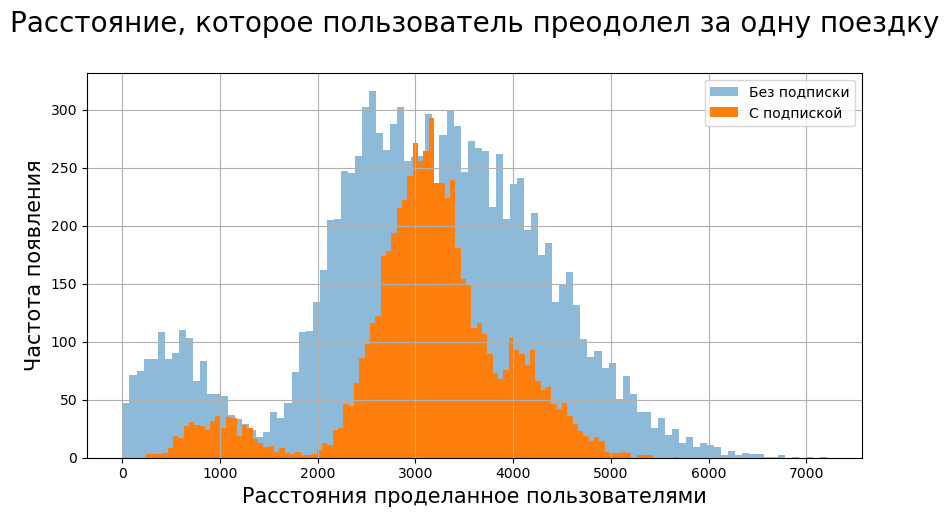

In [17]:
free['distance'].hist(bins=100, figsize=(10, 5), alpha=0.5)
(
    ultra['distance'].hist(bins=100, figsize=(10, 5))
    .set_title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", fontsize = 20)
)
plt.xlabel('Расстояния проделанное пользователями', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.legend(('Без подписки', 'С подпиской'));

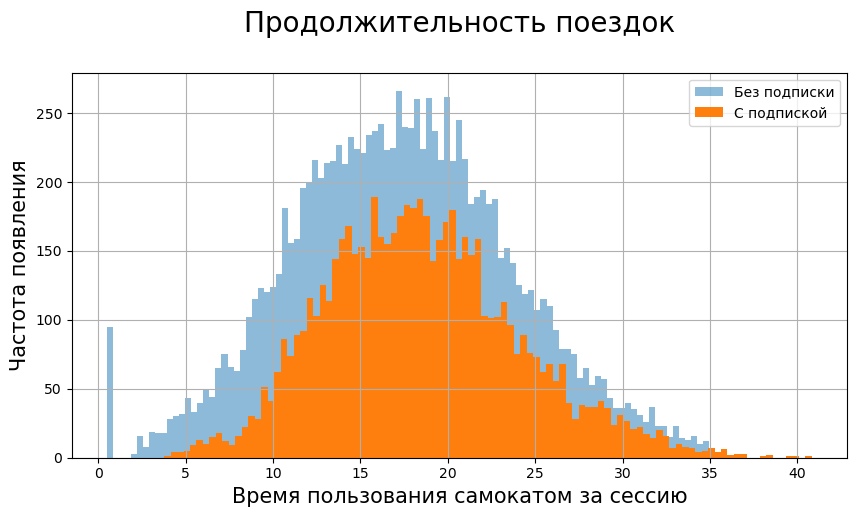

In [18]:
free['duration'].hist(bins=100, figsize=(10, 5), alpha=0.5)
(
    ultra['duration'].hist(bins=100, figsize=(10, 5))
    .set_title('Продолжительность поездок' + "\n", fontsize = 20)
)
plt.xlabel('Время пользования самокатом за сессию', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.legend(('Без подписки', 'С подпиской'));

Обе категории пользователей использовали самокаты чаще всего от 15 до 20 минут. Оба графика выглядят как нормальное распределение, однако пользователи с подпиской используют самокат дольше 35 минут, чем пользователи без.

### Шаг 5. Подсчёт выручки

#### 

In [19]:
all_merged['duration'] = np.ceil(all_merged['duration'])
counting = all_merged.pivot_table(index=['user_id', 'month', 'subscription_type'], 
                                  values=['distance', 'duration'], 
                                  aggfunc={'distance': 'sum', 'duration':['count', 'sum']}).reset_index()

#### 

In [20]:
def calculating_profits(row):
    subscription_type = row['subscription_type']
    if subscription_type == 'ultra':
        return 0 * row['number_trips'] + 6 * row['sum_duration'] + 199
    else:
        return 50 * row['number_trips'] + 8 * row['sum_duration'] + 0

In [21]:
counting.columns = ['user_id', 'month', 
                    'subscription_type', 'sum_distance', 
                    'number_trips', 'sum_duration']
print(f'Число пропусков в сводной таблице:\n{counting.isna().sum()}')
counting['profits'] = counting.apply(calculating_profits, axis=1)
counting

Число пропусков в сводной таблице:
user_id              0
month                0
subscription_type    0
sum_distance         0
number_trips         0
sum_duration         0
dtype: int64


,user_id,month,subscription_type,sum_distance,number_trips,sum_duration,profits
0,1,1,ultra,7027.511294,2,42.0,451.0
1,1,4,ultra,754.159807,1,7.0,241.0
2,1,8,ultra,6723.470560,2,46.0,475.0
3,1,10,ultra,5809.911100,2,32.0,391.0
4,1,11,ultra,7003.499363,3,56.0,535.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,2,26.0,308.0
11327,1534,8,free,7622.453034,2,48.0,484.0
11328,1534,9,free,4928.173852,1,23.0,234.0
11329,1534,11,free,13350.015305,4,78.0,824.0


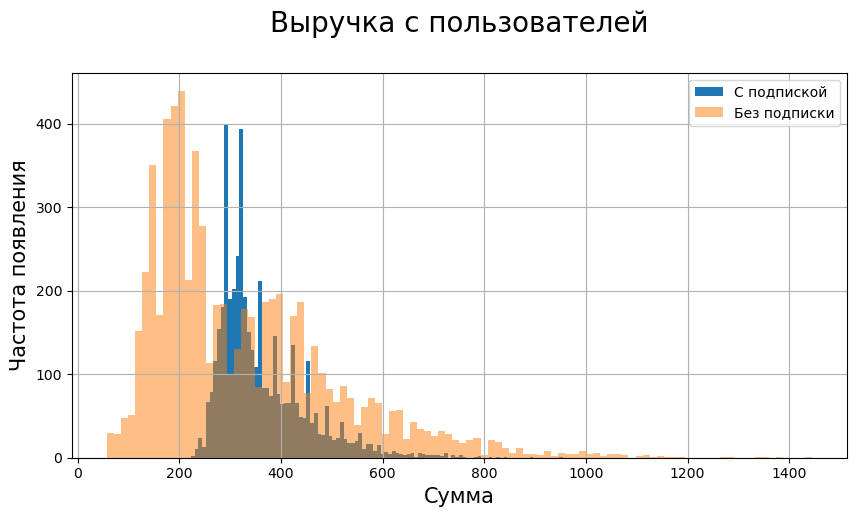

In [22]:
counting.query('subscription_type == "ultra"')['profits'].hist(bins=100, figsize=(10, 5));
(
    counting.query('subscription_type == "free"')['profits'].hist(bins=100, figsize=(10, 5), alpha = 0.5)
    .set_title('Выручка с пользователей' + "\n", fontsize = 20)
)
plt.xlabel('Сумма', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.legend(('С подпиской', 'Без подписки'));

Большее количество пользователей без подписки приносят в среднем 200, в свою очередь с ней в районе 300.

### Шаг 6. Проверка гипотез

#### 

Нулевая гипотеза: средние значения продолжительности поездки у групп пользователей с подпиской и без равны.

Альтернативная гипотеза: среднее значение продолжительности поездки у группы пользователей с подпиской больше чем без.

In [23]:
alpha = 0.05
results_duration = st.ttest_ind(ultra['duration'], free['duration'], alternative='greater')
print(f'p-value: {results_duration.pvalue}')
if results_duration.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Есть основания полагать, что пользователи с подпиской больше проводят времени на поездки.

#### 

Нулевая гипотеза: среднее расстояние пройденное пользователями с подпиской 3130м.

Альтернативная гипотеза: среднее расстояние пройденное пользователями с подпиской более 3130м.

In [24]:
alpha = 0.05
value = 3130
results_distance = st.ttest_1samp(ultra['distance'], value, alternative='greater')
print('p-значение:', results_distance.pvalue)
if results_distance.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Есть основания полагать, что среднее растояние пройденное на самокатах клиентами с подпиской не привышает оптимального расстояния по износу.

#### 

Нулевая гипотеза: средние значения помесячной выручки у групп пользователей с подпиской и без равны.

Альтернативная гипотеза: среднее значение помесячной выручки у группы пользователей с подпиской больше чем без.

In [25]:
alpha = 0.05
results_profits = st.ttest_ind(counting.query('subscription_type == "ultra"')['profits'],
                               counting.query('subscription_type == "free"')['profits'],
                               alternative='greater')
print(f'p-value: {results_profits.pvalue}')
if results_duration.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Есть основания полагать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

#### 

Мне бы понадобилось выполнить T-test для парных выборок, проверяя одностороннюю гипотезу, используя метод scipy.stats.ttest_rel()

После проведённого анализа, делаю следующие выоды: в городе Пятигорск чаще всего брали самокаты в аренду, а в Москве реже, количество клиентов сервиса без подписки преобладает над теми, у кого она есть. В большинстве возраст составляет 25 лет, пройденное расстояние на самоктах около 3150 метров, время аренды примерно от 15 до 20 минут. Есть различие между числом пользователей с подпиской, которые используют самокат дольше 35 минут, и без неё вообще нет. Также встречаются немалые значения в пройденном расстоянии на отметке 500 метров, думаю они связаны с тем, что самокат мог был быть неисправен. По большей части пользователи без подписки приносят выручки на 200 единиц, а с ней на 300.  
При проверке первой гипотезы, было выявлено то, что многовероятно пользователи с подпиской больше проводят времени на поездки, нежели чем без неё.  
При проверке второй гипотезы небезосновтельно выяснилось, что растояние пройденное на самокатах клиентами с подпиской не привышает оптимального расстояния по износу.  
После проверки третьей гипотезы о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, я выяснил, что нет оснований предполагать обратного, следовательно, пользователи с подпиской являются более выгодными для компании.